**Importing Necessary Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

**Load, Read, and Print Dataset**

In [2]:
path = "C:/Users/shakib/Downloads/Fraudulent_online_shops_dataset.csv"
data = pd.read_csv(path)
data.head(3)

,Online shop URL,Label,Domain length,Top domain length,Presence of prefix 'www',Number of digits,Number of letters,Number of dots (.),Number of hyphens (-),Presence of credit card payment,...,SSL certificate expire date,Issuer organization,SSL certificate issuer organization list item,Indication of young domain,Domain registration date,Presence of TrustPilot reviews,TrustPilot score,Presence of SiteJabber reviews,Presence in the standard Tranco list,Tranco List rank
0,https://www.allaccessorybest.com,fraudulent,24,3,1,0,27,2,0,1,...,Oct 11 03:53:36 2023 GMT,Google Trust Services LLC,9,1,2023-05-15 03:35,0,NaN,0,0,-1
1,https://www.b-watches.shop,fraudulent,18,4,1,0,20,2,1,0,...,Jun 16 23:59:59 2024 GMT,"Cloudflare, Inc.",1,1,2023-06-18 05:43,0,NaN,0,0,-1
2,https://www.waeschenamen-windrath.de,legitimate,28,2,1,0,30,2,1,1,...,Oct 24 21:53:20 2023 GMT,Let's Encrypt,2,2,Hidden,0,-1.0,0,0,-1


**Number of Observations and Columns**

In [3]:
print("Observations: ", str(len(data)))
print("Columns: ", str(len(data.columns)))

Observations:  1140
Columns:  26


**Pie Chart of Target Variable (Label)**

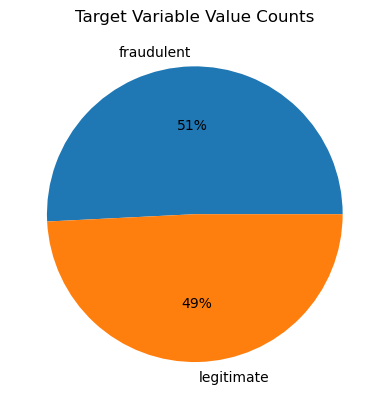

In [4]:
labels = data.Label.unique()
sizes = data.Label.value_counts().values

fig, ax = plt.subplots()
ax.pie(sizes, labels = labels, autopct='%1.0f%%')
ax.set_title('Target Variable Value Counts')
plt.show()

**Detect Missing Values**

In [5]:
data.isna().sum()

Online shop URL                                    0
Label                                              0
Domain length                                      0
Top domain length                                  0
Presence of prefix 'www'                           0
Number  of digits                                  0
Number  of letters                                 0
Number  of dots (.)                                0
Number  of hyphens (-)                             0
Presence of credit card payment                    0
Presence of money back payment                     0
Presence of cash on delivery payment               0
Presence of crypto currency                        0
Presence of free contact emails                    0
Presence of logo URL                               0
SSL certificate issuer                             0
SSL certificate expire date                        0
Issuer organization                                0
SSL certificate issuer organization list item 

**Drop Columns:** <br>
**"TrustPilot score" Column has 560 missing values** <br>
**"Online shop URL" Column is Unnecessary**

In [6]:
data = data.drop(columns=['TrustPilot score', 'Online shop URL'])
data.isna().sum()

Label                                            0
Domain length                                    0
Top domain length                                0
Presence of prefix 'www'                         0
Number  of digits                                0
Number  of letters                               0
Number  of dots (.)                              0
Number  of hyphens (-)                           0
Presence of credit card payment                  0
Presence of money back payment                   0
Presence of cash on delivery payment             0
Presence of crypto currency                      0
Presence of free contact emails                  0
Presence of logo URL                             0
SSL certificate issuer                           0
SSL certificate expire date                      0
Issuer organization                              0
SSL certificate issuer organization list item    0
Indication of young domain                       0
Domain registration date       

**Convert "Label" Column from Categorical to Numerical Values:** <br>
**fraudulent = 1** <br>
**legitimate = 0**

In [7]:
data['Label'] = data['Label'].map({'fraudulent': 1, 'legitimate': 0})
data.head(3)

,Label,Domain length,Top domain length,Presence of prefix 'www',Number of digits,Number of letters,Number of dots (.),Number of hyphens (-),Presence of credit card payment,Presence of money back payment,...,SSL certificate issuer,SSL certificate expire date,Issuer organization,SSL certificate issuer organization list item,Indication of young domain,Domain registration date,Presence of TrustPilot reviews,Presence of SiteJabber reviews,Presence in the standard Tranco list,Tranco List rank
0,1,24,3,1,0,27,2,0,1,1,...,GTS CA 1P5,Oct 11 03:53:36 2023 GMT,Google Trust Services LLC,9,1,2023-05-15 03:35,0,0,0,-1
1,1,18,4,1,0,20,2,1,0,1,...,Cloudflare Inc ECC CA-3,Jun 16 23:59:59 2024 GMT,"Cloudflare, Inc.",1,1,2023-06-18 05:43,0,0,0,-1
2,0,28,2,1,0,30,2,1,1,0,...,R3,Oct 24 21:53:20 2023 GMT,Let's Encrypt,2,2,Hidden,0,0,0,-1


**Categorical to Numeric Conversion using Label Encoder:** <br>
**"Issuer organization" Column has 18 categories** <br>
**"SSL certificate issuer" Column has 43 categories**

In [8]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding on the 'Category' column
data['Issuer organization'] = label_encoder.fit_transform(data['Issuer organization'])
data['SSL certificate issuer'] = label_encoder.fit_transform(data['SSL certificate issuer'])

data.head(3)

,Label,Domain length,Top domain length,Presence of prefix 'www',Number of digits,Number of letters,Number of dots (.),Number of hyphens (-),Presence of credit card payment,Presence of money back payment,...,SSL certificate issuer,SSL certificate expire date,Issuer organization,SSL certificate issuer organization list item,Indication of young domain,Domain registration date,Presence of TrustPilot reviews,Presence of SiteJabber reviews,Presence in the standard Tranco list,Tranco List rank
0,1,24,3,1,0,27,2,0,1,1,...,17,Oct 11 03:53:36 2023 GMT,7,9,1,2023-05-15 03:35,0,0,0,-1
1,1,18,4,1,0,20,2,1,0,1,...,6,Jun 16 23:59:59 2024 GMT,2,1,1,2023-06-18 05:43,0,0,0,-1
2,0,28,2,1,0,30,2,1,1,0,...,29,Oct 24 21:53:20 2023 GMT,8,2,2,Hidden,0,0,0,-1


**Convert "SSL certificate expire date" Column into Unix Timestamp Values**

In [9]:
# Convert to datetime
data['SSL certificate expire date'] = pd.to_datetime(data['SSL certificate expire date'], format='%b %d %H:%M:%S %Y %Z')

# Remove timezone information
data['SSL certificate expire date'] = data['SSL certificate expire date'].dt.tz_localize(None)

# Convert to Unix timestamp using .view()
data['SSL certificate expire date'] = data['SSL certificate expire date'].view('int64') // 10**9  # Dividing by 10^9 to get seconds

data.head(3)

,Label,Domain length,Top domain length,Presence of prefix 'www',Number of digits,Number of letters,Number of dots (.),Number of hyphens (-),Presence of credit card payment,Presence of money back payment,...,SSL certificate issuer,SSL certificate expire date,Issuer organization,SSL certificate issuer organization list item,Indication of young domain,Domain registration date,Presence of TrustPilot reviews,Presence of SiteJabber reviews,Presence in the standard Tranco list,Tranco List rank
0,1,24,3,1,0,27,2,0,1,1,...,17,1696996416,7,9,1,2023-05-15 03:35,0,0,0,-1
1,1,18,4,1,0,20,2,1,0,1,...,6,1718582399,2,1,1,2023-06-18 05:43,0,0,0,-1
2,0,28,2,1,0,30,2,1,1,0,...,29,1698184400,8,2,2,Hidden,0,0,0,-1


**Count Occurrences of Hidden and None in "Domain registration date"**

In [10]:
hidden_count = (data['Domain registration date'] == 'Hidden').sum()
none_count = (data['Domain registration date'] == 'None').sum()

print(f"Hidden: {hidden_count}")
print(f"None: {none_count}")

Hidden: 117
None: 4


**1. Convert "Domain registration date" Column into Unix Timestamp Values** <br>
**2. Convert Hidden into -1** <br>
**2. Convert None into 0**

In [11]:
# Function to convert to Unix timestamp or leave as is
def convert_to_timestamp(value):
    if value == 'Hidden':
        return -1
    elif value == 'None':
        return 0
    else:
        # Convert to datetime and then to Unix timestamp
        return int(pd.to_datetime(value).timestamp())

# Apply the function to the column
data['Domain registration date'] = data['Domain registration date'].apply(convert_to_timestamp)

data.head(3)

,Label,Domain length,Top domain length,Presence of prefix 'www',Number of digits,Number of letters,Number of dots (.),Number of hyphens (-),Presence of credit card payment,Presence of money back payment,...,SSL certificate issuer,SSL certificate expire date,Issuer organization,SSL certificate issuer organization list item,Indication of young domain,Domain registration date,Presence of TrustPilot reviews,Presence of SiteJabber reviews,Presence in the standard Tranco list,Tranco List rank
0,1,24,3,1,0,27,2,0,1,1,...,17,1696996416,7,9,1,1684121700,0,0,0,-1
1,1,18,4,1,0,20,2,1,0,1,...,6,1718582399,2,1,1,1687066980,0,0,0,-1
2,0,28,2,1,0,30,2,1,1,0,...,29,1698184400,8,2,2,-1,0,0,0,-1


**Summary of Preprocessed Data**

In [12]:
data.describe()

,Label,Domain length,Top domain length,Presence of prefix 'www',Number of digits,Number of letters,Number of dots (.),Number of hyphens (-),Presence of credit card payment,Presence of money back payment,...,SSL certificate issuer,SSL certificate expire date,Issuer organization,SSL certificate issuer organization list item,Indication of young domain,Domain registration date,Presence of TrustPilot reviews,Presence of SiteJabber reviews,Presence in the standard Tranco list,Tranco List rank
count,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,...,1140.000000,1.140000e+03,1140.000000,1140.000000,1140.000000,1.140000e+03,1140.000000,1140.000000,1140.000000,1140.000000
mean,0.507895,18.341228,2.851754,0.665789,0.070175,21.654386,1.708772,0.157895,0.763158,0.713158,...,20.777193,1.699456e+09,7.072807,4.570175,0.620175,1.320604e+09,0.223684,0.038596,0.015789,9710.771053
std,0.500157,4.512033,0.741322,0.471921,0.395748,4.307723,0.495203,0.403648,0.425331,0.452486,...,9.073566,7.145170e+06,2.448227,3.336470,0.664235,5.189841e+08,0.416896,0.192716,0.124715,84946.859868
min,0.000000,7.000000,2.000000,0.000000,0.000000,11.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,1.691250e+09,0.000000,1.000000,0.000000,-1.000000e+00,0.000000,0.000000,0.000000,-1.000000
25%,0.000000,15.000000,2.000000,0.000000,0.000000,19.000000,1.000000,0.000000,1.000000,0.000000,...,17.000000,1.695533e+09,7.000000,2.000000,0.000000,1.160650e+09,0.000000,0.000000,0.000000,-1.000000
50%,1.000000,19.000000,3.000000,1.000000,0.000000,22.000000,2.000000,0.000000,1.000000,1.000000,...,17.000000,1.697087e+09,8.000000,2.000000,1.000000,1.556272e+09,0.000000,0.000000,0.000000,-1.000000
75%,1.000000,21.000000,3.000000,1.000000,0.000000,24.250000,2.000000,0.000000,1.000000,1.000000,...,29.000000,1.698508e+09,8.000000,9.000000,1.000000,1.683644e+09,0.000000,0.000000,0.000000,-1.000000
max,1.000000,38.000000,13.000000,1.000000,4.000000,39.000000,3.000000,4.000000,1.000000,1.000000,...,42.000000,1.726618e+09,17.000000,11.000000,2.000000,1.692325e+09,1.000000,1.000000,1.000000,964101.000000


**Normalization using MinMaxScaler**

In [13]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the entire dataset
data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

data.head(3)

,Label,Domain length,Top domain length,Presence of prefix 'www',Number of digits,Number of letters,Number of dots (.),Number of hyphens (-),Presence of credit card payment,Presence of money back payment,...,SSL certificate issuer,SSL certificate expire date,Issuer organization,SSL certificate issuer organization list item,Indication of young domain,Domain registration date,Presence of TrustPilot reviews,Presence of SiteJabber reviews,Presence in the standard Tranco list,Tranco List rank
0,1.0,0.548387,0.090909,1.0,0.0,0.571429,0.5,0.00,1.0,1.0,...,0.404762,0.162487,0.411765,0.8,0.5,0.995153,0.0,0.0,0.0,0.0
1,1.0,0.354839,0.181818,1.0,0.0,0.321429,0.5,0.25,0.0,1.0,...,0.142857,0.772812,0.117647,0.0,0.5,0.996893,0.0,0.0,0.0,0.0
2,0.0,0.677419,0.000000,1.0,0.0,0.678571,0.5,0.25,1.0,0.0,...,0.690476,0.196076,0.470588,0.1,1.0,0.000000,0.0,0.0,0.0,0.0


**Shuffle Data to Ensure Randomness**

In [14]:
data = data.sample(frac=1, random_state=4).reset_index(drop=True)

**Split Data into Specified Parts**

In [15]:
train_data = data.iloc[:1000]  # First 1000 rows
unseen_data = data.iloc[1000:1140]  # Next 140 rows

**Save Preprocessed Data**

In [16]:
train_data.to_csv('C:/Users/shakib/Downloads/Train Data.csv', index=False)
unseen_data.to_csv('C:/Users/shakib/Downloads/Unseen Data.csv', index=False)